In [1]:
import numpy as np
import networkx as nx
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# import igraph
# import community

/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


План на сегодня (остальное идет в качестве Домашней работы):


1. Power law distribution
    - Generate power law distribution   (4)
    - Plot power law, PDF, CDF          (4)
    - Plot power law in log-log scale   (4)
    - Estimate alpha (slope) using simple linear regression (4) 
    - Plot empirical PDF/CDF vs Theoretical with estimated alpha (4)
2. ITaS network analysis
    - Analyse simple network properties (#vertices, #edges, #connected components) (4)
    - Plot degree distribution  (4)
    - Does power law holds for these networks? Plot log-log, estimate alpha (4)
    - Plot/compute radius (distribution and against degree), diameter, shortest path distribution (4)
    - Compute centrality measures (degree, closeness, betweenness, eigenvector), plot comparison figures.  (4)
3. Download your VK egocentric network (different types 0-1-2-levels could be time consuming)
    - Analyse simple network properties (#vertices, #edges, #connected components) (4)
    - Plot degree distribution, does power law hold for your network? (4)
    - Compute centrality measures for your network (degree, closeness, betweenness, eigenvector),
      interpret the ranking results (4)
    - Using different layouts plot you network, use different node characteristics as node size/color
      (you could also download meta data: gender, age, city) (4)
    - *Find network communities using either igraph or community package, analyse the results (10)
4. Имплементируйте модели случайных графов которые наилучшим образом описывают различные характеристики
   вашей социальной сети, используйте разные модели для моделирования разных характеристик.
   - Preferential attachement (to model power law distr.) (5)
   - Configuration model (to model degree sequence) (10)
   - Stochastic-block model (to model community structure) (10)
   - Compare different model with your own network (using different characteristics), which model describe your network best? (10)
   
   
Total 101/100
 

# 1. Power law

    1. Generate 10000 uniformly distributed pseudorandom numbers.
    2. Produce power law
    3. Generate power law distribution
    4. Plot power law, PDF, CDF
    5. Plot power law in log-log scale
    6. Estimate alpha (slope) using simple linear regression 
    7. Plot empirical PDF vs Theoretical with estimated alpha

In [2]:
# define uniform distribution
u = stats.uniform(0,1)
# our power distribution stuff
alpha = 1.7
x_min = 2
c = (alpha-1)/(np.power(x_min,1-alpha))
# F^{-1}:
F = lambda y: np.power(1-y,1/(1-alpha))*x_min

In [3]:
u_sample = u.rvs(10000)
pl_sample = F(u_sample)

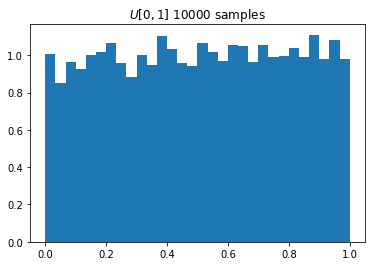

In [4]:
plt.hist(u_sample, bins=30, normed=True);
plt.title(r'$U[0,1]$ 10000 samples')
plt.show()

In [5]:
n = 50
x_max = 100
x = np.linspace(x_min,x_max, n)
pdf = c*np.power(x,-1*alpha)
cdf = np.cumsum(pdf)/pdf.sum()

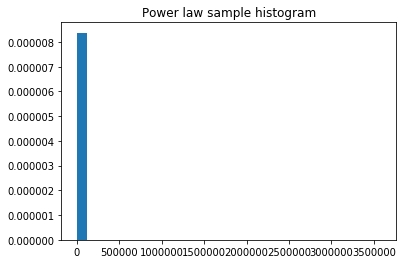

In [6]:
plt.title(r'Power law sample histogram')
plt.hist(pl_sample, bins=30, normed=True, label = '10000 samles');

In [7]:
# let's drop some big values
pl_sample.max()
(pl_sample>x_max).sum()

670

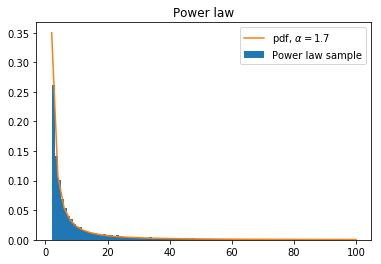

In [8]:
plt.hist(pl_sample[pl_sample<=x_max], bins=100, normed=True, label = 'Power law sample');
plt.plot(x, pdf, label='pdf, '+r'$\alpha = $'+f'{alpha}')
plt.title(r'Power law')
plt.legend()
plt.show()

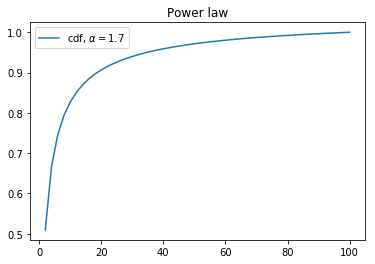

In [9]:
plt.plot(x, cdf, label='cdf, '+r'$\alpha = $'+f'{alpha}')
plt.title(r'Power law')
plt.legend()
plt.show()

In [10]:
np.unique(np.round(pl_sample[pl_sample<=x_max],2), return_counts=True)

(array([ 2.  ,  2.01,  2.02, ..., 99.49, 99.59, 99.99]),
 array([23, 46, 37, ...,  1,  1,  1]))

/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


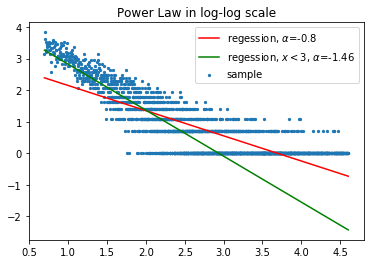

In [11]:
# log-log scale
from sklearn.linear_model import LinearRegression
plt.title('Power Law in log-log scale')
x_,y = np.unique(np.round(pl_sample[pl_sample<=x_max],2), return_counts=True)
plt.scatter(np.log(x_),np.log(y), s=5, label = 'sample')
lm = LinearRegression()
lm.fit(np.log(x_)[None].T,np.log(y))

lm2 = LinearRegression()
lm2.fit(np.log(x_)[np.log(x_)<3][None].T,np.log(y)[np.log(x_)<3])


plt.plot(np.log(x_), lm.intercept_+lm.coef_*np.log(x_), 'r', label='regession, '+r'$\alpha$='+f'{round(lm.coef_[0],2)}')
plt.plot(np.log(x_), lm2.intercept_+lm2.coef_*np.log(x_), 'g', label='regession, '+r'$x<3$, $\alpha$='+f'{round(lm2.coef_[0],2)}')

#plt.xlabel('Value')
#plt.ylabel('Count')
plt.legend()

In [12]:
alpha_e = -1*lm2.coef_[0]
c_e = (alpha_e-1)/(np.power(x_min,1-alpha_e))
pdf_e = c_e*np.power(x,-1*alpha_e)

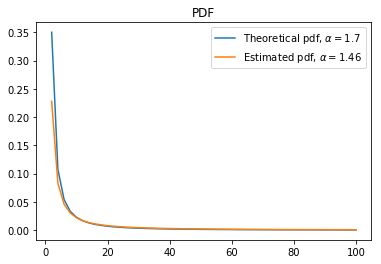

In [13]:
plt.plot(x, pdf, label='Theoretical pdf, '+r'$\alpha = $'+f'{alpha}')
plt.plot(x, pdf_e, label='Estimated pdf, '+r'$\alpha = $'+f'{round(alpha_e,2)}')
plt.title('PDF')
plt.legend()

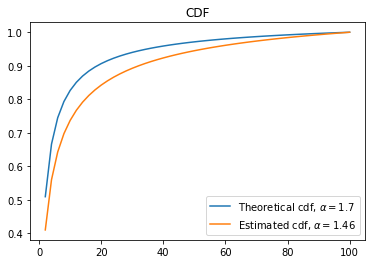

In [14]:
plt.plot(x, np.cumsum(pdf)/pdf.sum(), label='Theoretical cdf, '+r'$\alpha = $'+f'{alpha}')
plt.plot(x, np.cumsum(pdf_e)/pdf_e.sum(), label='Estimated cdf, '+r'$\alpha = $'+f'{round(alpha_e,2)}')
plt.title('CDF')
plt.legend()

# 2. ITaS network

In [15]:
from utils import get_coauthors
import pandas as pd

/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [16]:
path = "."
fname = '{}/itas_2009-2017_v8.xls'.format(path)
itas_all = pd.read_excel(fname)

adj, names, n_papers = get_coauthors(itas_all)
nx_graph = nx.Graph(adj)

In [17]:
# 3
print('Nodes count:', len(nx_graph.nodes))
print('Edges count:', len(nx_graph.edges))
print('Density: ', nx.density(nx_graph))
print('Connected components:', nx.number_connected_components(nx_graph))

Nodes count: 1068
Edges count: 2018
Density:  0.003541730287936705
Connected components: 207


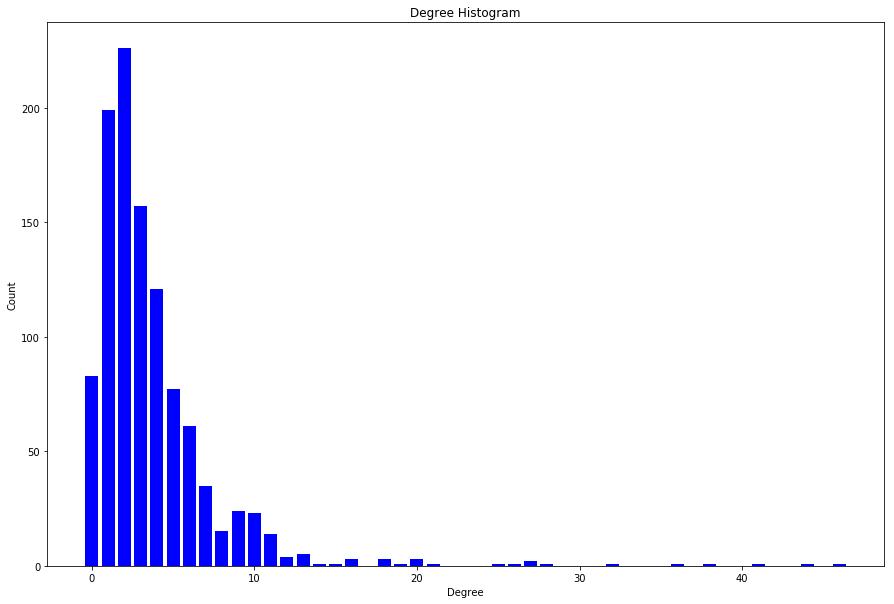

In [18]:
# 4
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
import collections
G = nx_graph.copy()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

Text(0,0.5,'Number of nodes')

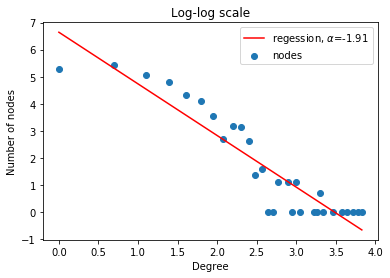

In [19]:
# 5
lm3 = LinearRegression()
deg = np.array(deg)
cnt = np.array(cnt)
# we should remove 0, because of using log function
deg_ = np.log(deg[deg!=0])
cnt_ = np.log(cnt[deg!=0])
#lm3.fit(deg_[deg_<3.5][None].T,cnt_[deg_<3.5])
lm3.fit(deg_[None].T,cnt_)
plt.scatter(deg_, cnt_, label='nodes')
plt.title('Log-log scale')
plt.plot(deg_, lm3.intercept_+lm3.coef_*deg_, 'r', label='regession, '+r'$\alpha$='+f'{round(lm3.coef_[0],2)}')
plt.legend()

plt.xlabel('Degree')
plt.ylabel('Number of nodes')

/nmnt/media/home/kondrat1997/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


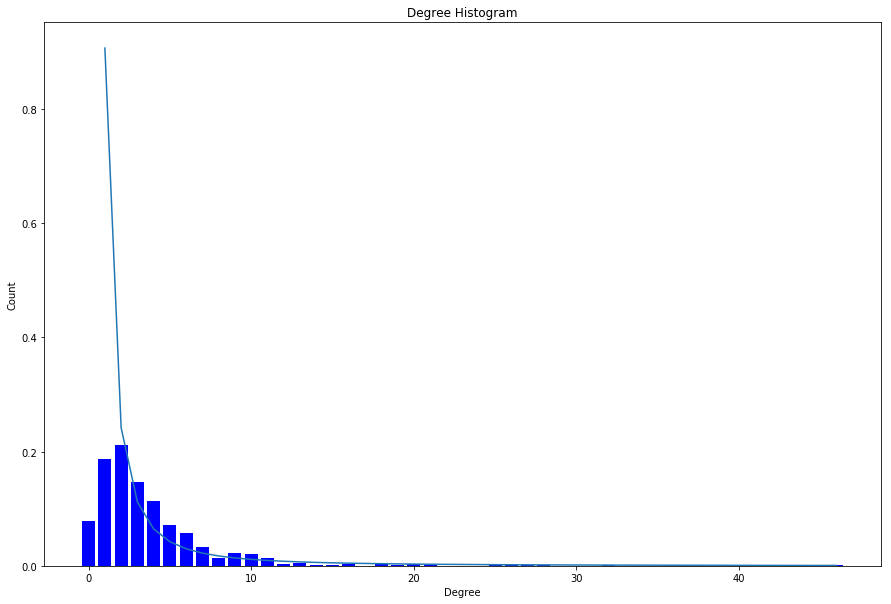

In [20]:
plt.figure(figsize=(15,10))
plt.bar(deg, cnt/cnt.sum(), width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

alpha_e = -1*lm3.coef_[0]
c_e = (alpha_e-1)/(np.power(1,1-alpha_e))
pdf_e = c_e*np.power(deg,-1*alpha_e)

plt.plot(deg[deg!=0], pdf_e[deg!=0], label='Estimated pdf, '+r'$\alpha = $'+f'{round(alpha_e,2)}')


plt.show()

In [28]:
# как видим, ну такое, тем более хвост слева, больше напоминает бета распределение/ распределение Пуассона

In [29]:
# 6
Gcc = max(nx.connected_component_subgraphs(nx_graph), key=len)
print('radius: ', nx.radius(Gcc))
print('diameter: ', nx.diameter(Gcc))

radius:  9
diameter:  17


In [30]:
spls = list(nx.all_pairs_shortest_path_length(Gcc))

In [31]:
paths = []
for v in spls:
    paths.extend(v[1].values())

In [32]:
value, count = np.unique(paths, return_counts=True)

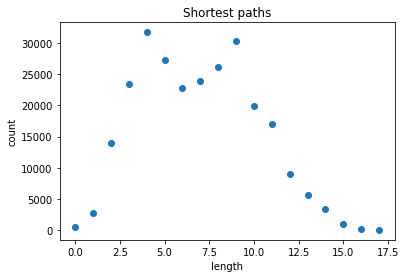

In [33]:
plt.title('Shortest paths')
plt.scatter(value,count)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

# 3. VK network analysis

1. You need to get access token, go here https://vk.com/dev and create stand alone application
2. Find your application id and go here (put your application id):

https://oauth.vk.com/authorize?client_id=APPLICATION_ID&
scope=photos,audio,video,docs,notes,pages,status,offers,questions
,wall,groups,messages,email,notifications,stats,ads,offline
,docs,pages,stats,notifications&response_type=token

last digits will be your access token.

e.g. access_token = '-----a4e013b3a92c----a032071d81f---e0e2595dab---d3a3559cc---a52ffbef---e91cf9be6e'
(I ommit some symbols, get your own access token)

3. List of api methods https://vk.com/dev/methods
4. We will mainly use friends.get and users.get

In [34]:
import requests
import time
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import numpy as np

from tqdm import tqdm_notebook

In [35]:
pwd

'/nmnt/media/home/kondrat1997/graphs_hw1/iitp_networks1/materials/HW1'

In [36]:
user_id = 262366170
access_token = 

SyntaxError: invalid syntax (<ipython-input-36-4d06861aa40f>, line 2)

In [37]:
ego_friends = np.load('ego_friends.npy').item()
graph = np.load('graph.npy').item()
data_graph = np.load('data_graph.npy').item()

## 3.1 Get additional user info

In [38]:
# 5
vk_graph = nx.Graph(graph)

In [53]:
nx_graph = vk_graph.copy()
nx_graph = nx_graph.subgraph(ego_friends['items'])

In [54]:
print('Nodes count:', len(nx_graph.nodes))
print('Edges count:', len(nx_graph.edges))
print('Density: ', nx.density(nx_graph))
print('Connected components:', nx.number_connected_components(nx_graph))

Nodes count: 301
Edges count: 5045
Density:  0.11173864894795127
Connected components: 3


In [56]:
# 6
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
import collections
G = nx_graph.copy()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

In [59]:
for d,c in zip(deg[-10:],cnt[-10:]):
    print(f'degree: {d}: {c}')

degree: 9: 7
degree: 8: 6
degree: 7: 8
degree: 6: 12
degree: 5: 10
degree: 4: 11
degree: 3: 8
degree: 2: 6
degree: 1: 11
degree: 0: 2


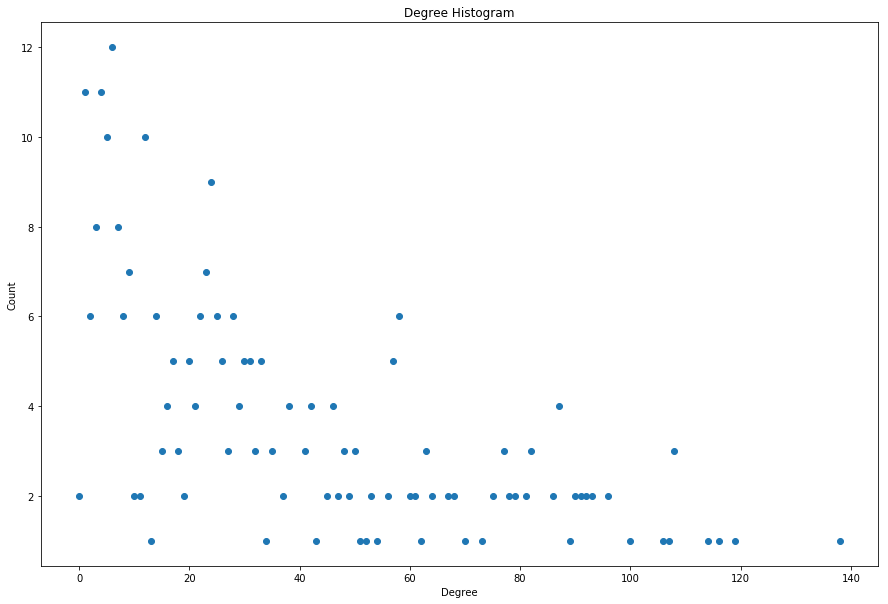

In [62]:
plt.figure(figsize=(15,10))
# remove russian rapper and "3rd level" friends with degree < 4
plt.scatter(deg, cnt)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

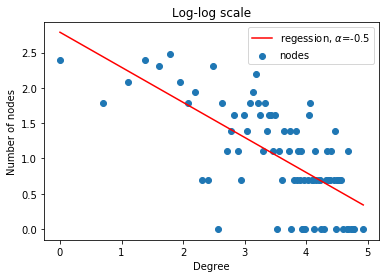

In [64]:
# 5
deg = np.array(deg)
cnt = np.array(cnt)
# we should remove 0, because of using log function
deg_ = np.log(deg[:-1])
cnt_ = np.log(cnt[:-1])

lm = LinearRegression()
lm.fit(deg_[None].T,cnt_)


#lm2 = LinearRegression()
#k = 3
#rule = deg_< k 
# so, let's try approximate left tail of the distribution by Power Law
#lm2.fit(deg_[rule][None].T,cnt_[rule])

plt.scatter(deg_, cnt_, label='nodes')
plt.title('Log-log scale')

#plt.plot(deg_, lm2.intercept_+lm2.coef_*deg_, 'g', label='regession, '+r'$degree<'+f'{k}'+r'$, $\alpha$='+f'{round(lm2.coef_[0],2)}')
plt.plot(deg_, lm.intercept_+lm.coef_*deg_, 'r', label='regession, '+r'$\alpha$='+f'{round(lm.coef_[0],2)}')

plt.legend()
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

As we can see Power Law doesn't hold for my network

In [ ]:
7. Compute centrality measures for your network (degree, closeness, betweenness, eigenvector),
  interpret the ranking results (4)
8. Using different layouts plot you network, use different node characteristics as node size/color
  (you could also download meta data: gender, age, city) (4)
9. *Find network communities using either igraph or community package, analyse the results (10)

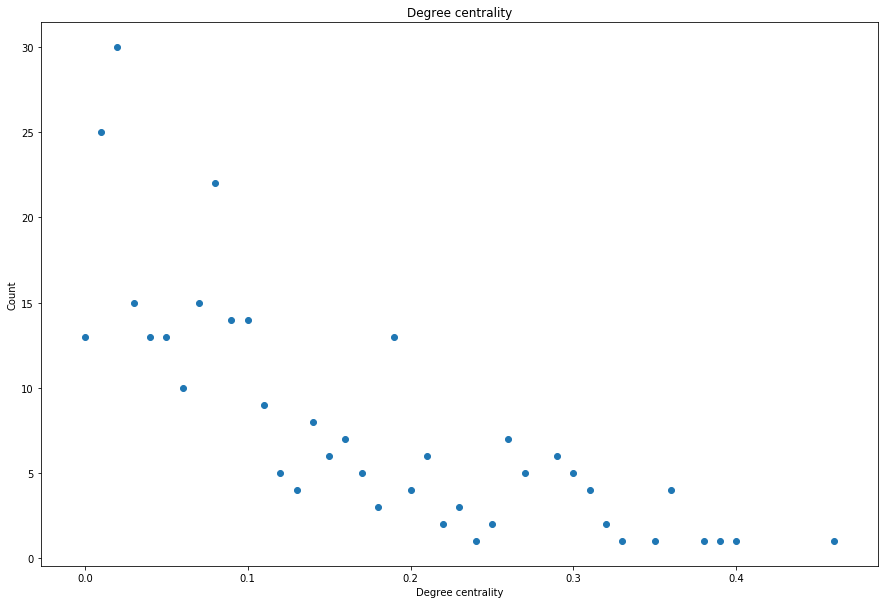

In [77]:
d = np.array([round(i,2) for i in nx.degree_centrality(nx_graph).values()])
plt.figure(figsize=(15,10))
# remove russian rapper and "3rd level" friends with degree < 4
deg, cnt = np.unique(d, return_counts=True)
plt.scatter(deg, cnt)

plt.title("Degree centrality")
plt.ylabel("Count")
plt.xlabel("Degree centrality")

plt.show()

In [80]:
d_ = nx.closeness_centrality(nx_graph)
d = np.array([round(i,2) for i in d_.values()])

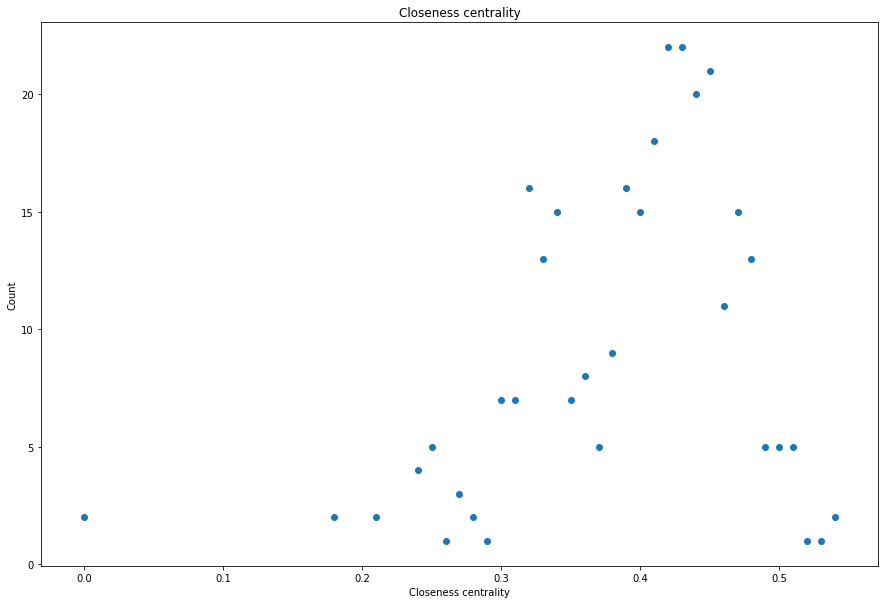

In [83]:
plt.figure(figsize=(15,10))
# remove russian rapper and "3rd level" friends with degree < 4
deg, cnt = np.unique(d, return_counts=True)
plt.scatter(deg, cnt)

plt.title("Closeness centrality")
plt.ylabel("Count")
plt.xlabel("Closeness centrality")

plt.show()

In [84]:
d_ = nx.betweenness_centrality(nx_graph)
d = np.array([round(i,2) for i in d_.values()])

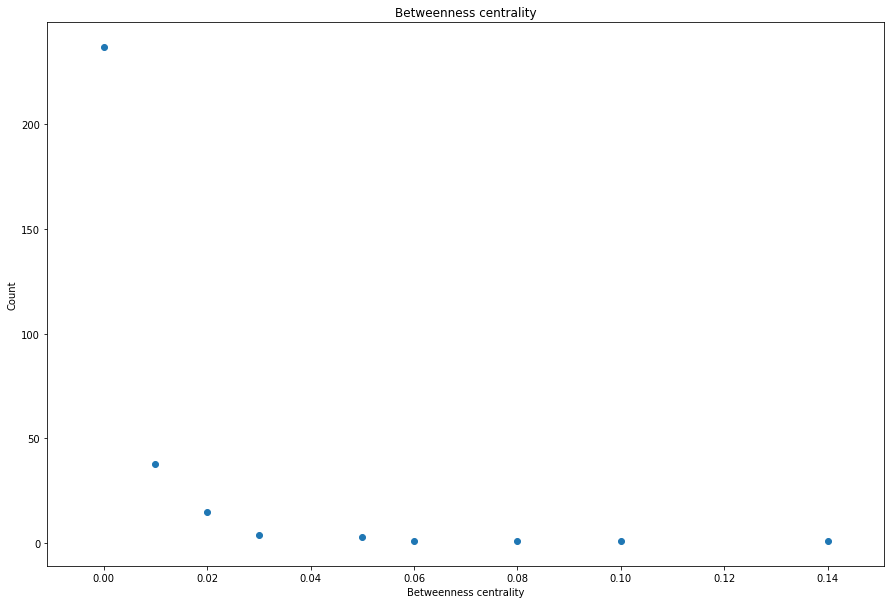

In [86]:
plt.figure(figsize=(15,10))
# remove russian rapper and "3rd level" friends with degree < 4
deg, cnt = np.unique(d, return_counts=True)
plt.scatter(deg, cnt)

plt.title("Betweenness centrality")
plt.ylabel("Count")
plt.xlabel("Betweenness centrality")

plt.show()

In [91]:
d_ = nx.eigenvector_centrality(nx_graph)
d = np.array([round(i,2) for i in d_.values()])

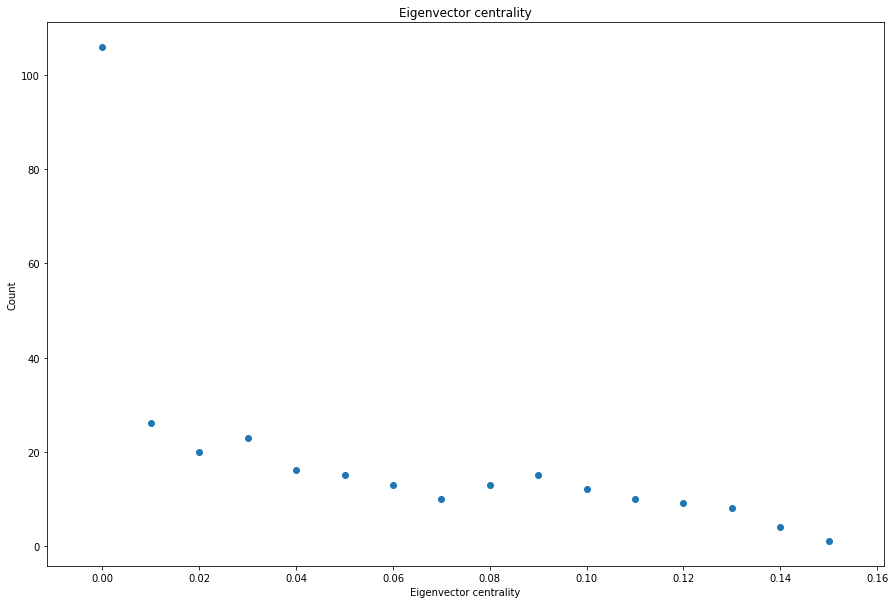

In [93]:
plt.figure(figsize=(15,10))
# remove russian rapper and "3rd level" friends with degree < 4
deg, cnt = np.unique(d, return_counts=True)
plt.scatter(deg, cnt)

plt.title("Eigenvector centrality")
plt.ylabel("Count")
plt.xlabel("Eigenvector centrality")

plt.show()

### It's time to draw it

In [427]:
def add_None(f):
    def dec_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return '???'
    return dec_f

def get_colored(d, th=5):
    n = 1
    res = {}
    for v,c in zip(*np.unique(list(d.values()), return_counts=True)):
        if c>th:
            res[v] = n
            n+=1
        else:
            res[v] = 0
    return res
    #return {c[0]: n if c[1]>th else 0 for n,c in enumerate(zip(*np.unique(list(d.values()), return_counts=True)),1)}

In [428]:
@add_None
def get_city(id_):
    return data_graph[id_]['city']['title']

@add_None
def get_univer(id_):
    return data_graph[id_]['university_name']

In [453]:
names_ = {id_: data_graph[id_]['first_name'] + ' ' + data_graph[id_]['last_name'] for id_ in nx_graph.nodes()}
cities_ =  {id_: get_city(id_) for id_ in nx_graph.nodes()}
city_color = get_colored(cities_)

univers_ = {id_: get_univer(id_) for id_ in nx_graph.nodes()}
univer_color = get_colored(univers_)
univer_color['МФТИ (ГУ) (см. в Москве)'] = univer_color['МФТИ (ГУ)']

In [518]:
ds_ = nx.degree_centrality(nx_graph)
ds__ = nx.betweenness_centrality(nx_graph)
ds = [5000*ds_[id_] for id_ in nx_graph.nodes()]
ds_b = [50000*ds__[id_] for id_ in nx_graph.nodes()]

In [508]:
pos = nx.kamada_kawai_layout(nx_graph)

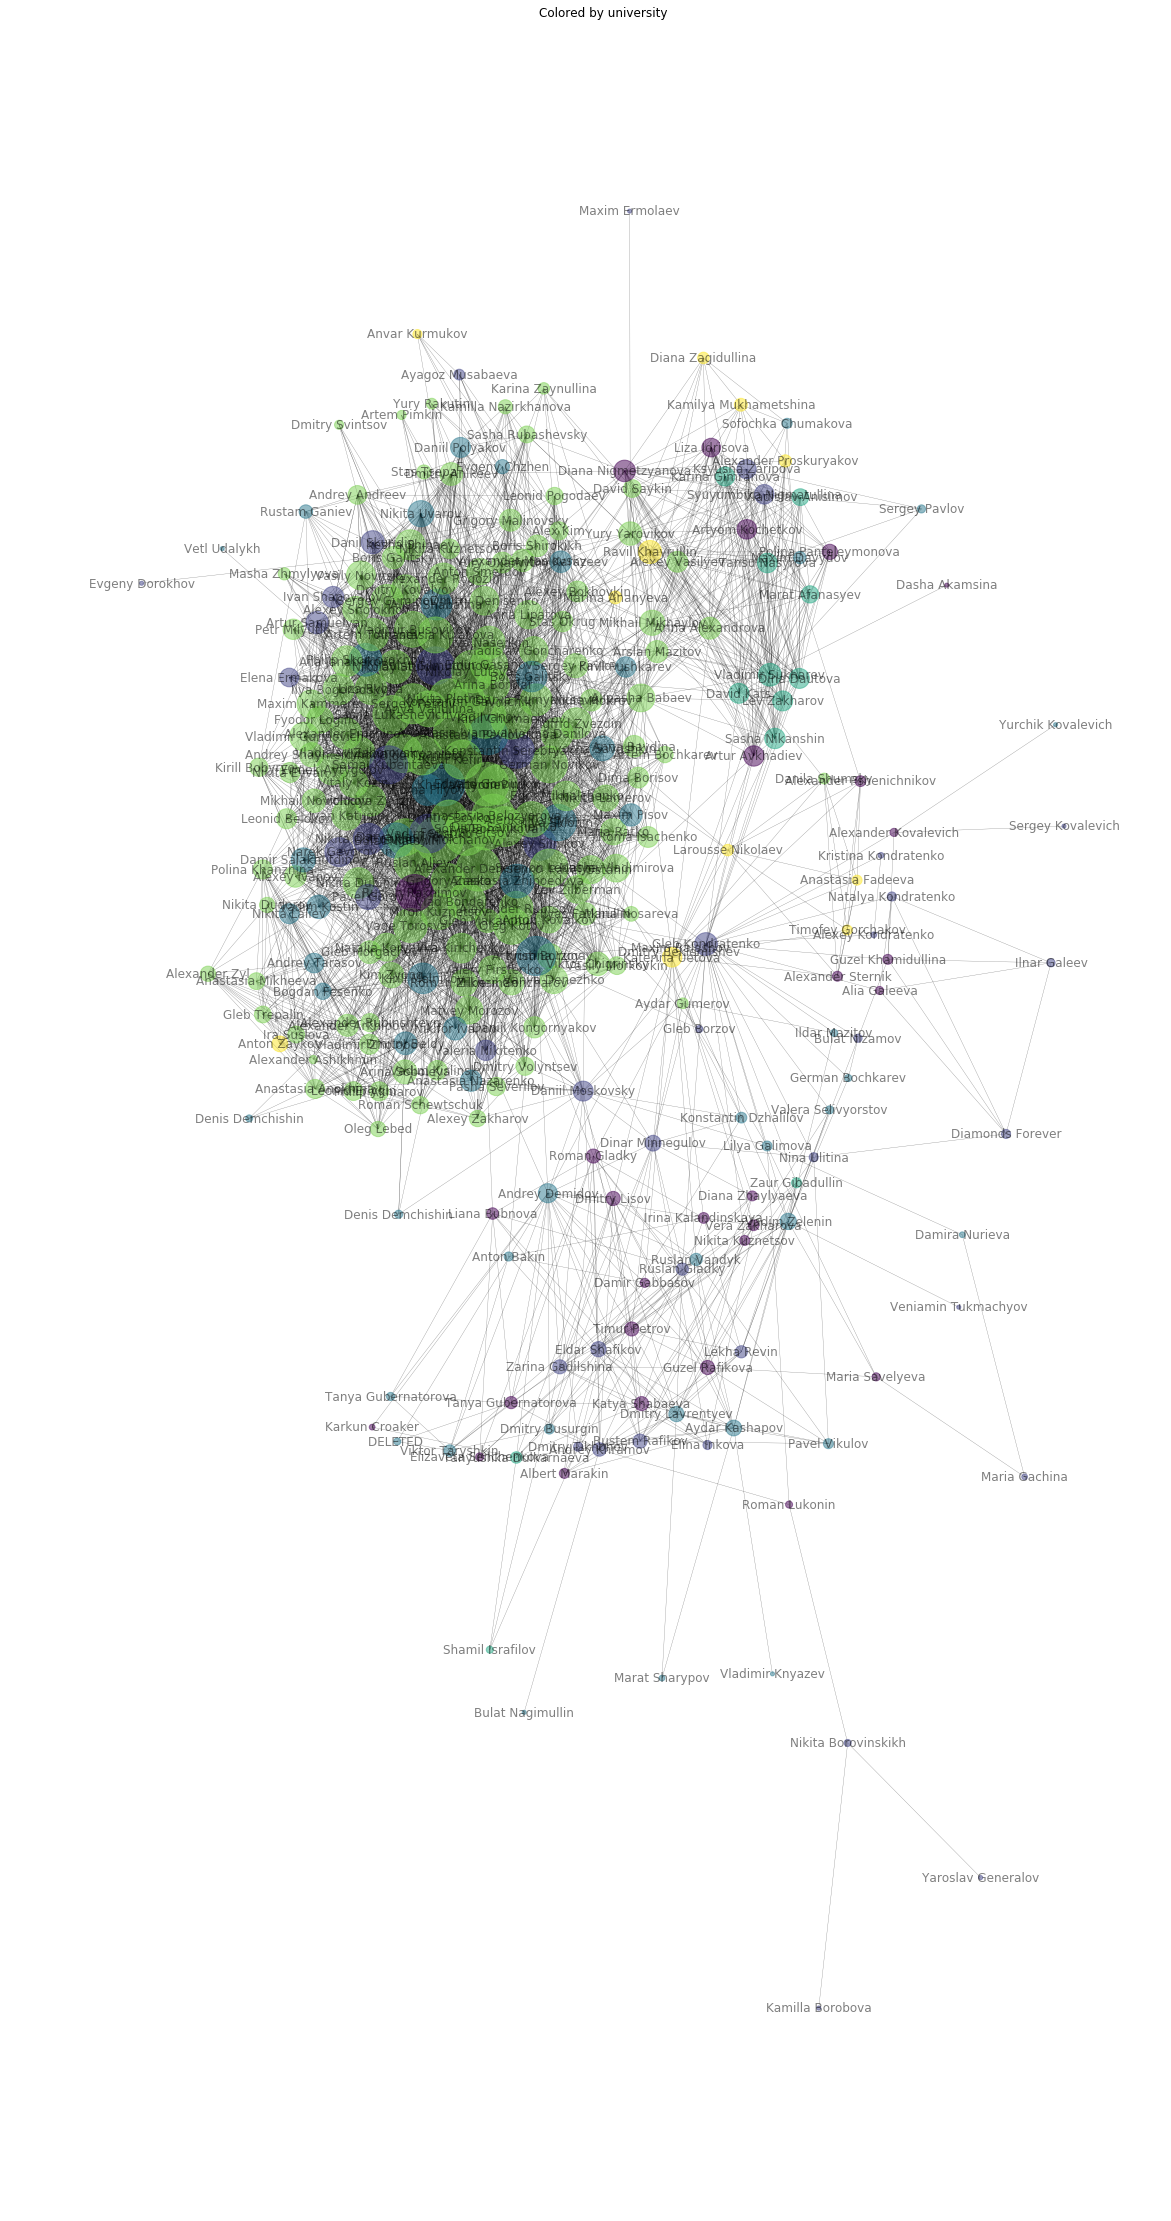

In [519]:
cl = [univer_color[univers_[id_]] for id_ in nx_graph.nodes()]

plt.figure(figsize=(20,40))
plt.title('Colored by university')
nx.draw(nx_graph,
        pos,
        node_color=cl, 
        node_size=ds, 
        alpha=0.5, 
        labels=names_,
        width=0.3
        )

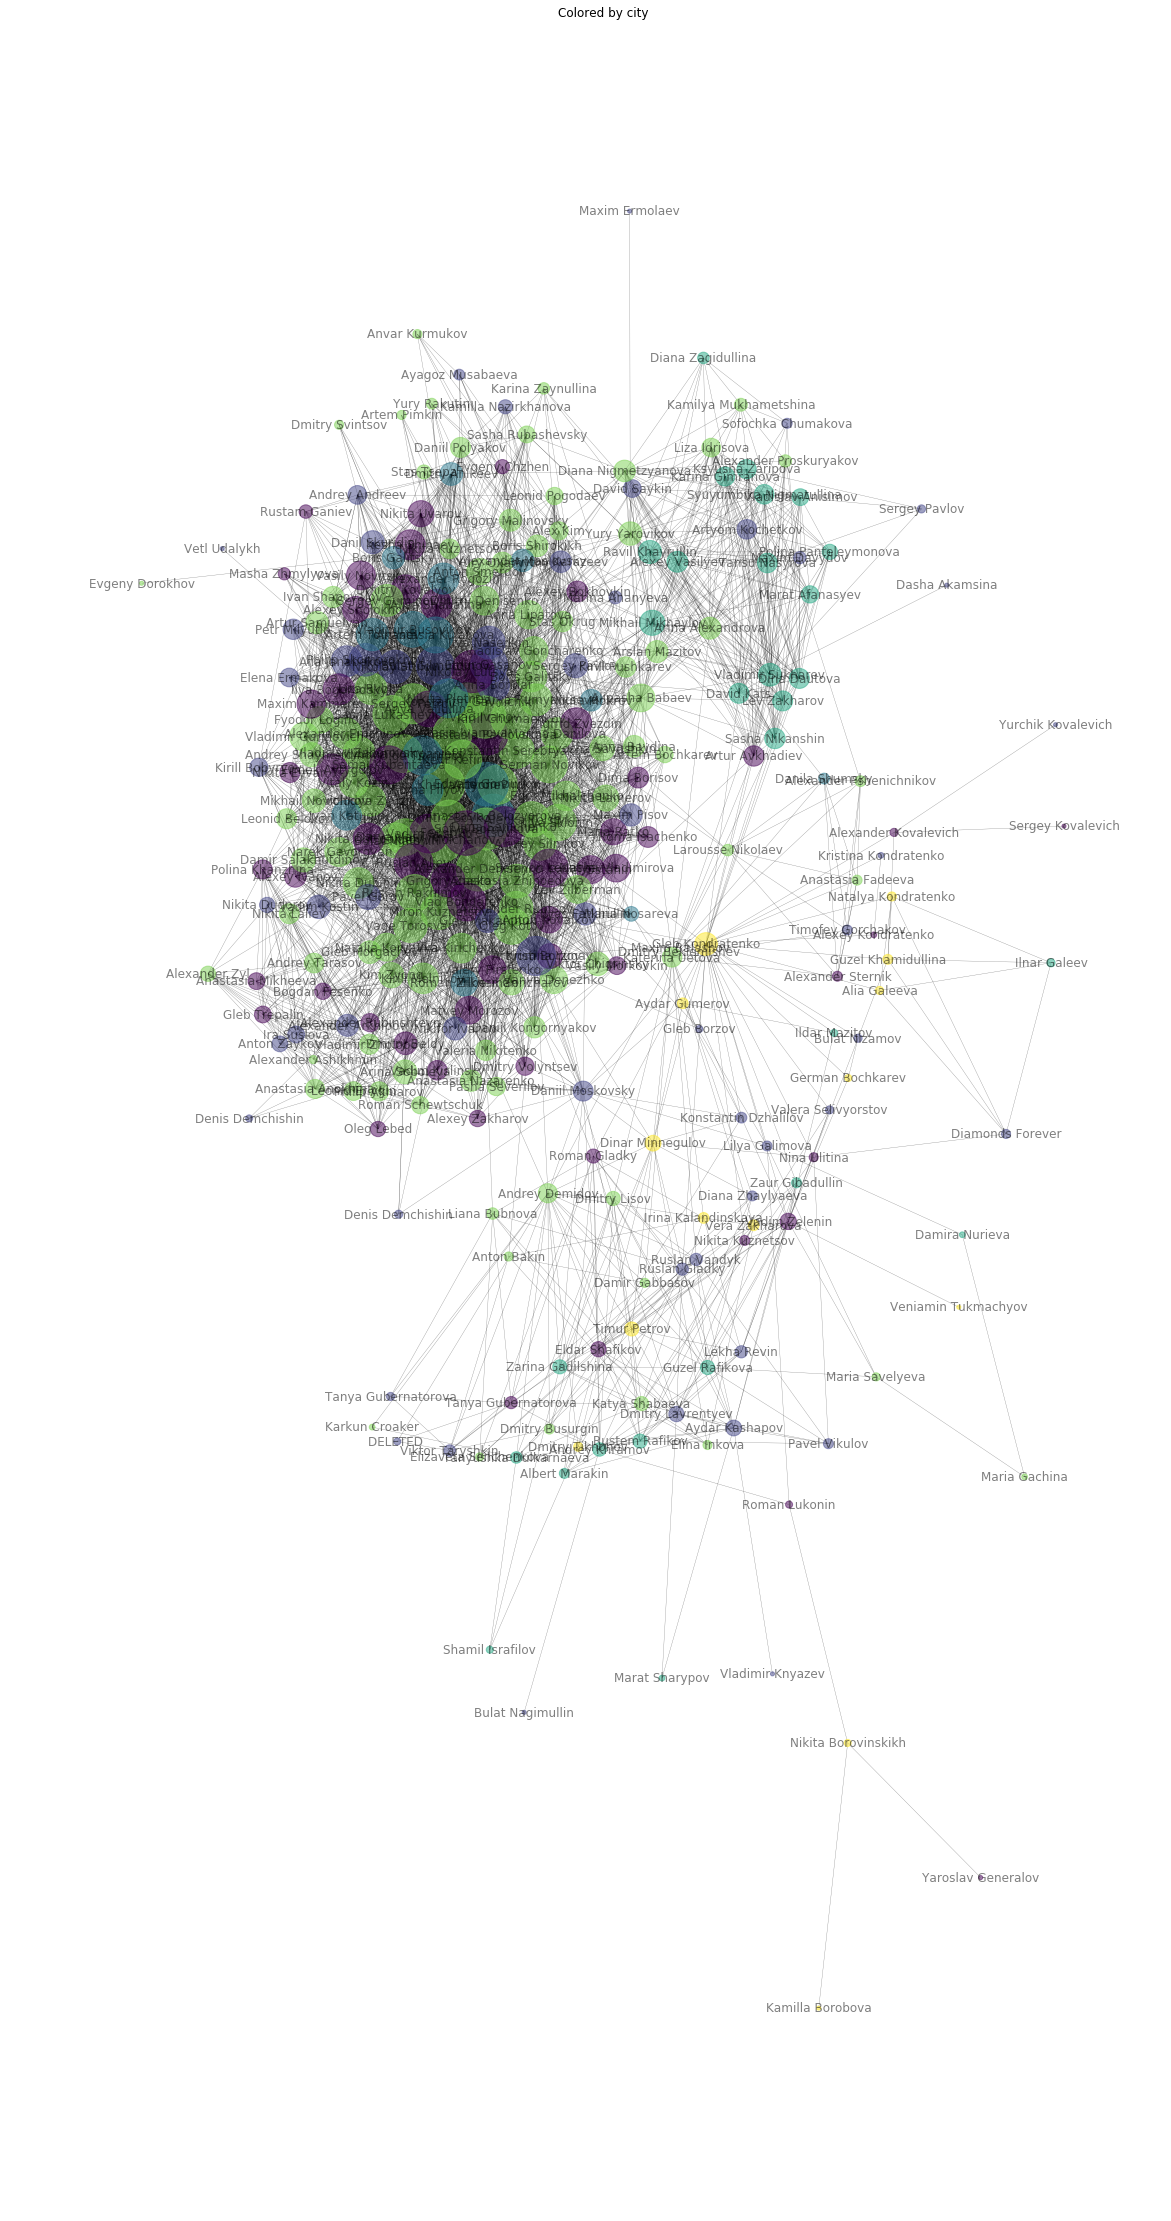

In [510]:
cl = [city_color[cities_[id_]] for id_ in nx_graph.nodes()]

plt.figure(figsize=(20,40))
plt.title('Colored by city')
nx.draw(nx_graph,
        pos,
        node_color=cl, 
        node_size=ds, 
        alpha=0.5, 
        labels=names_,
        width=0.3
        )

Как можно заметить, видны несколько сообществ.
Кластер физтехов, кластер ребят из Казани/КФУ (справа сверху) и кластер людей из Заинска (внизу) (из расскраски это не видо, ибо они все "казанцы" или "челнинцы").

### Поищем кластеры

In [511]:
import community

In [512]:
partition = community.best_partition(nx_graph)
cl = [partition[id_] for id_ in nx_graph.nodes()]

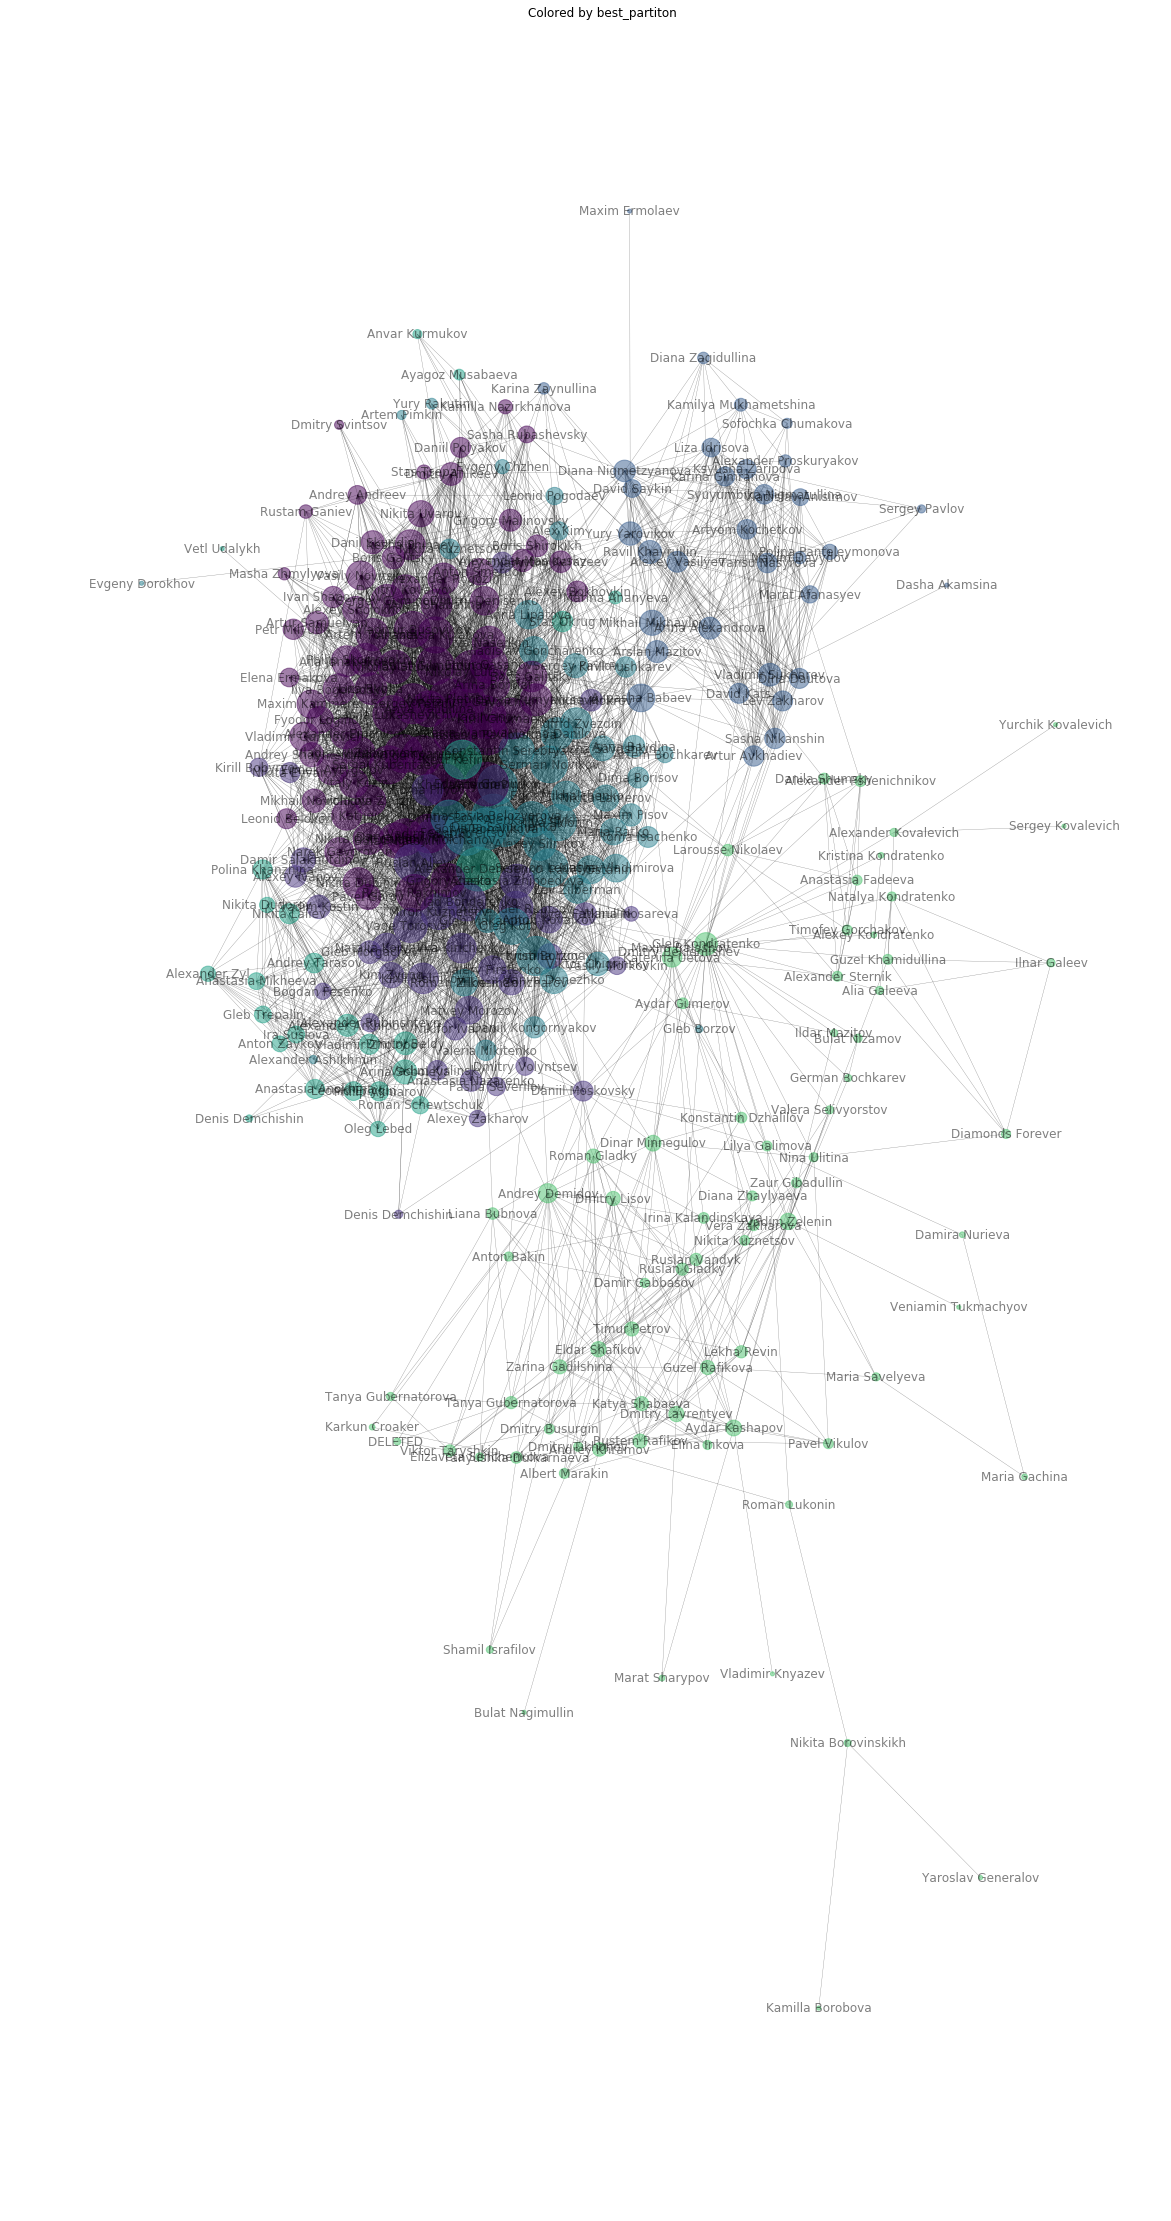

In [513]:
plt.figure(figsize=(20,40))
plt.title('Colored by best_partiton')
nx.draw(nx_graph,
        pos,
        node_color=cl, 
        node_size=ds, 
        alpha=0.5, 
        labels=names_,
        width=0.3
        )

In [514]:
size = float(len(set(partition.values())))
count = 0.
list_nodes = []
for com in set(partition.values()) :
    count = count + 1.
    list_nodes.append([nodes for nodes in partition.keys()
                                if partition[nodes] == com])
    

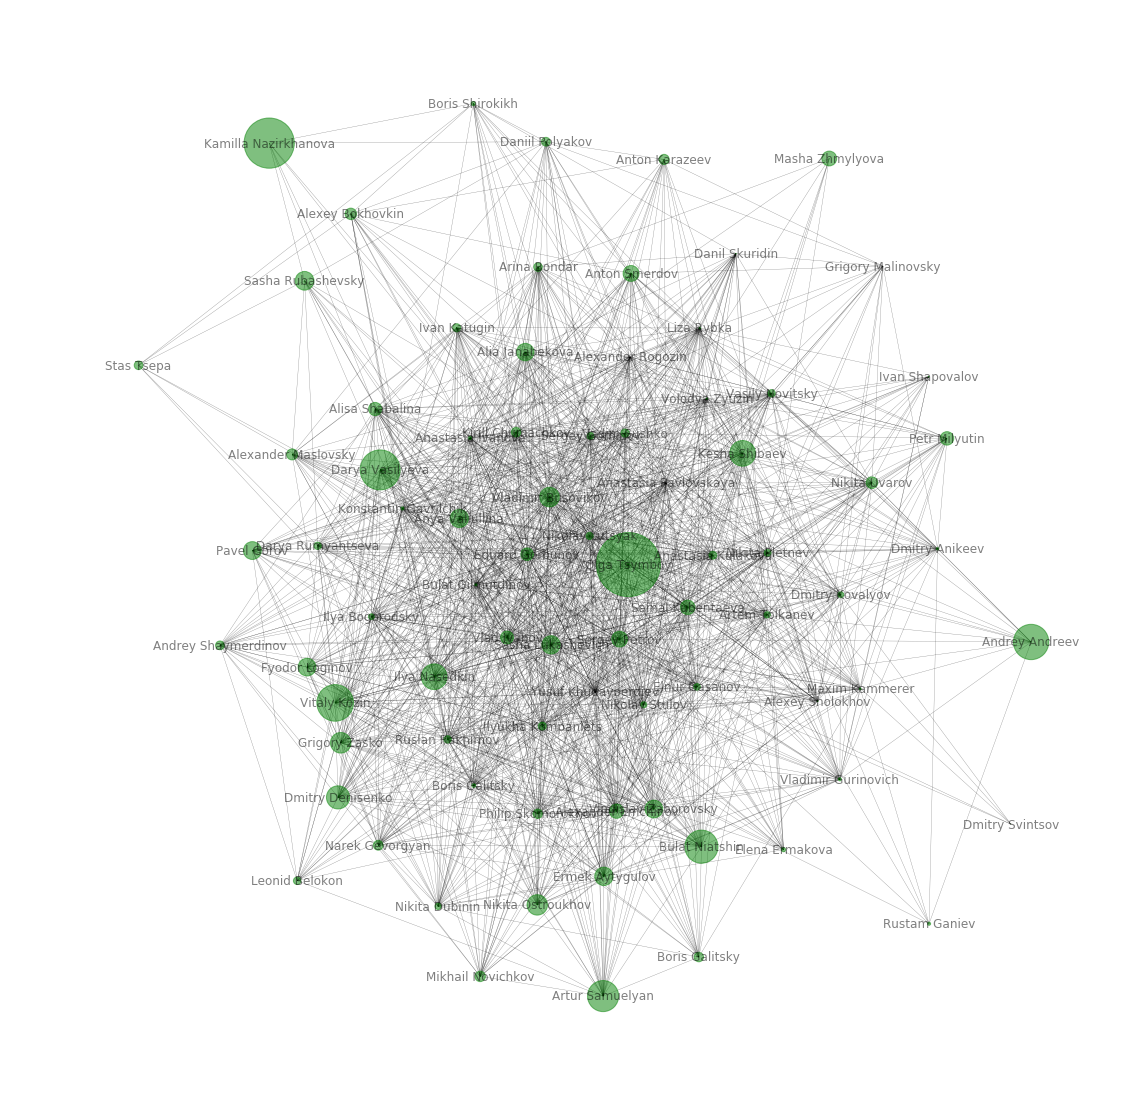

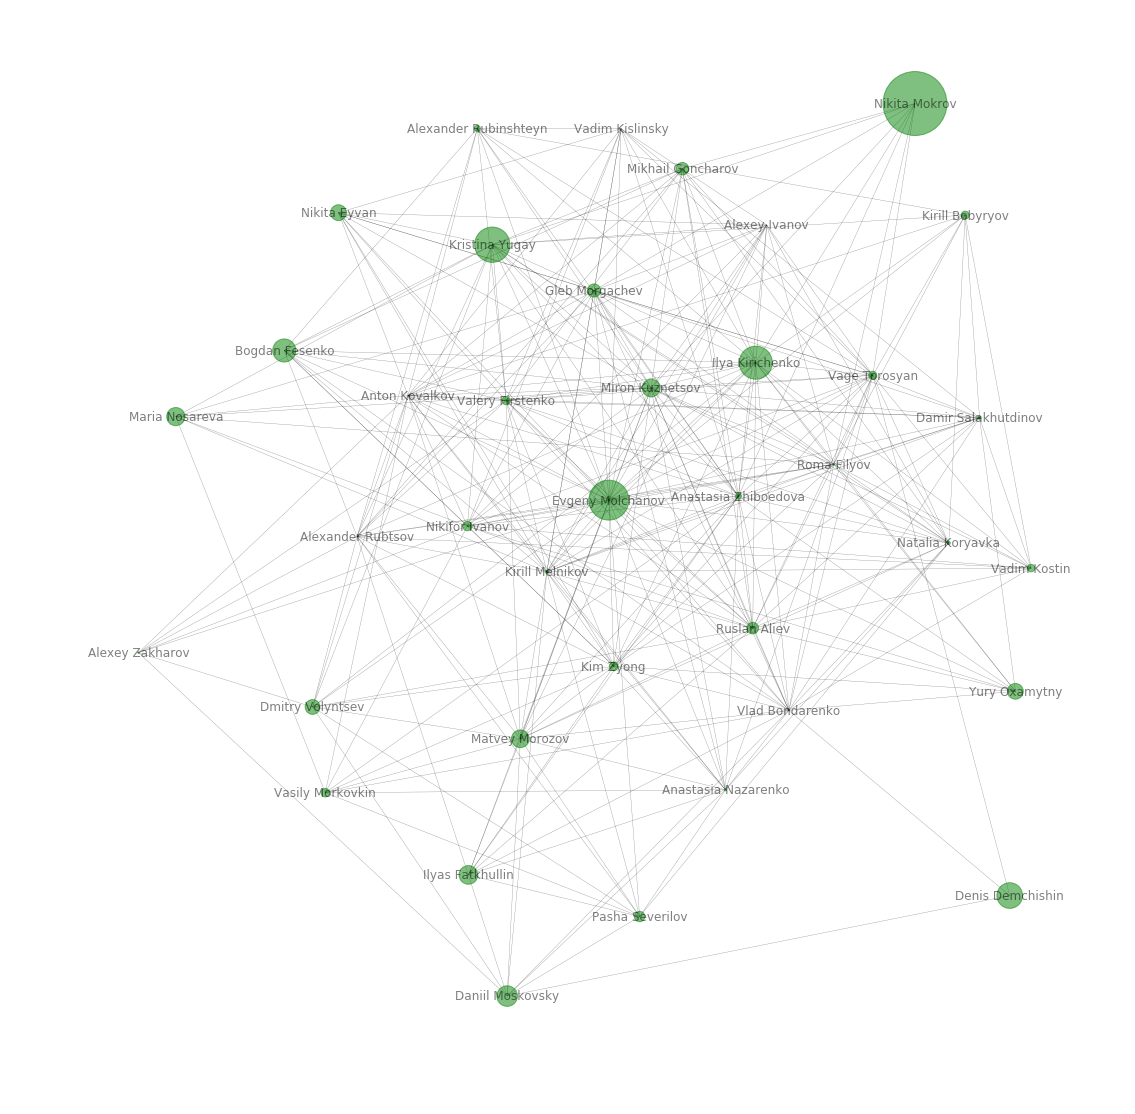

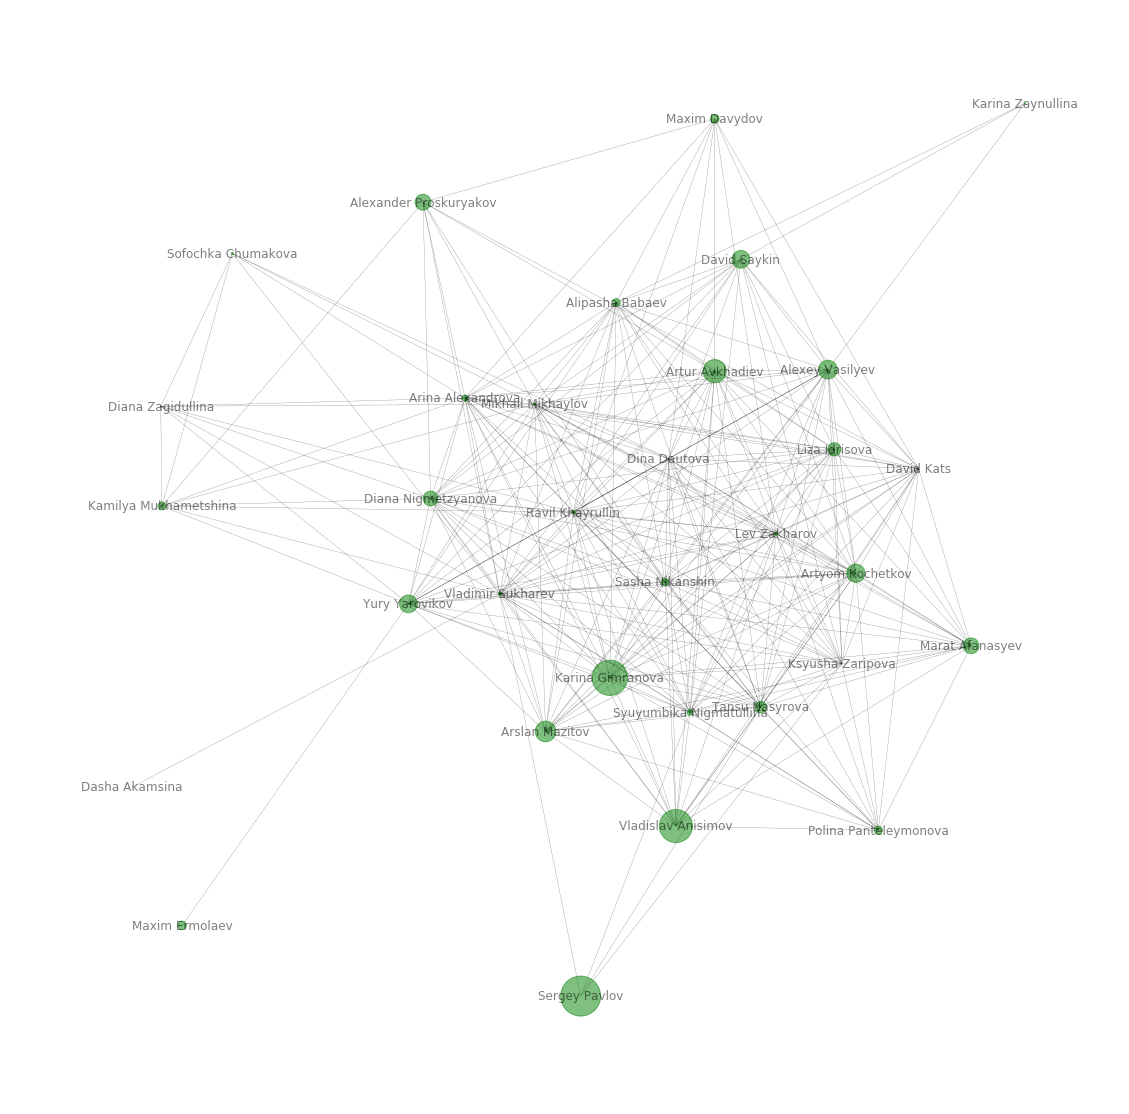

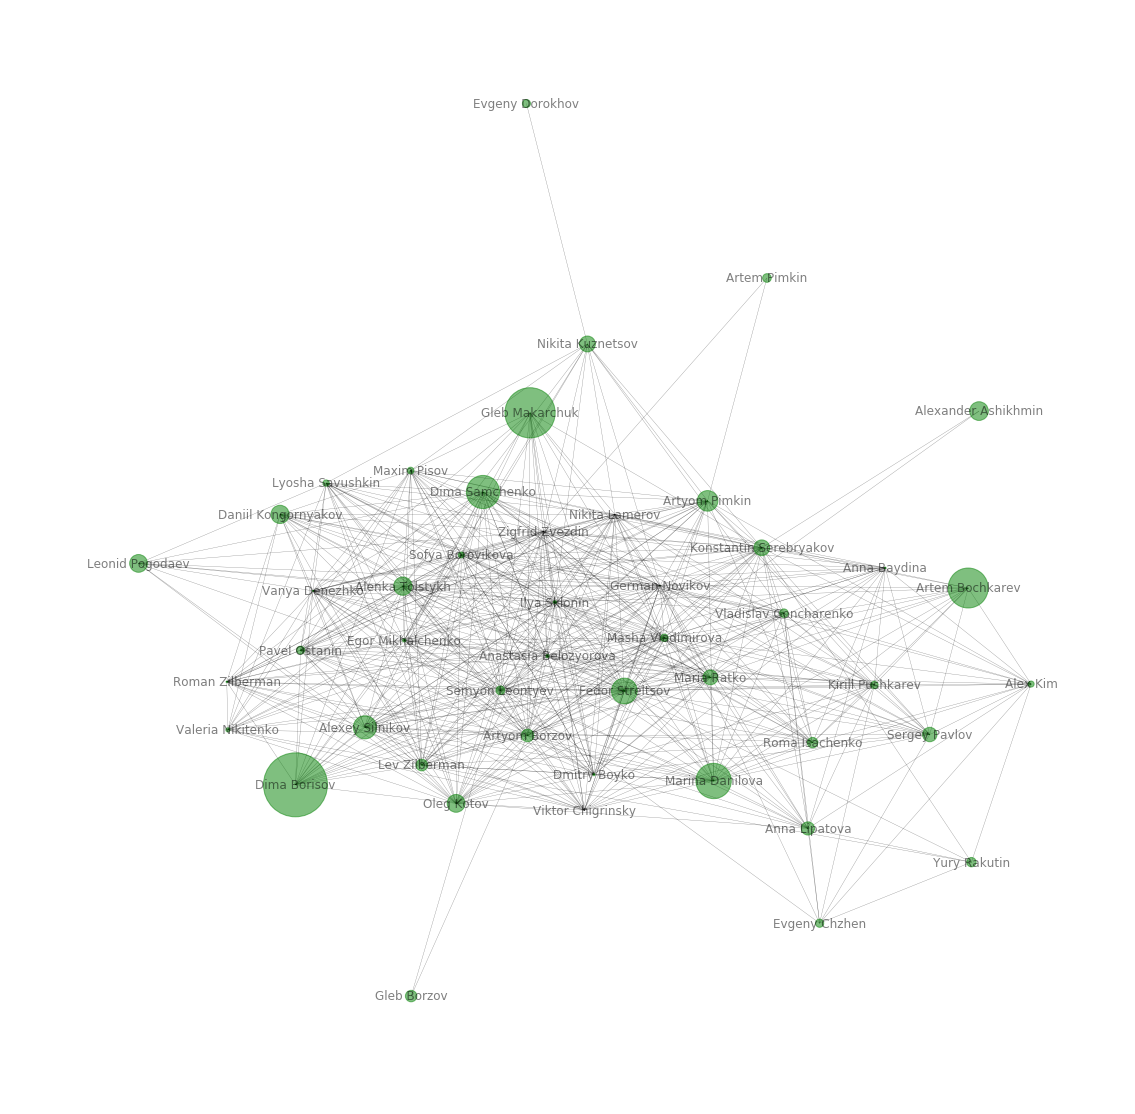

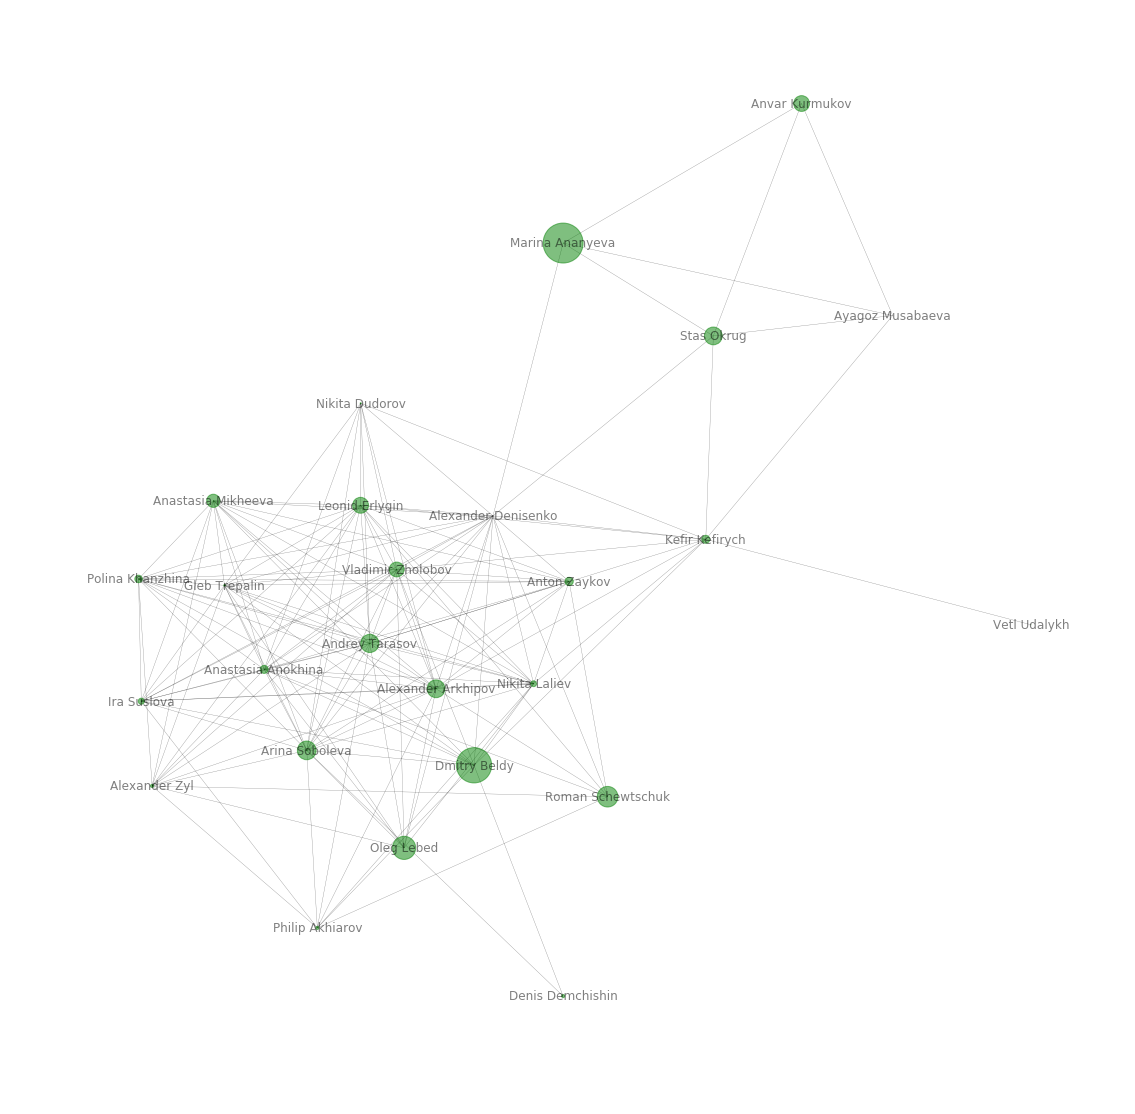

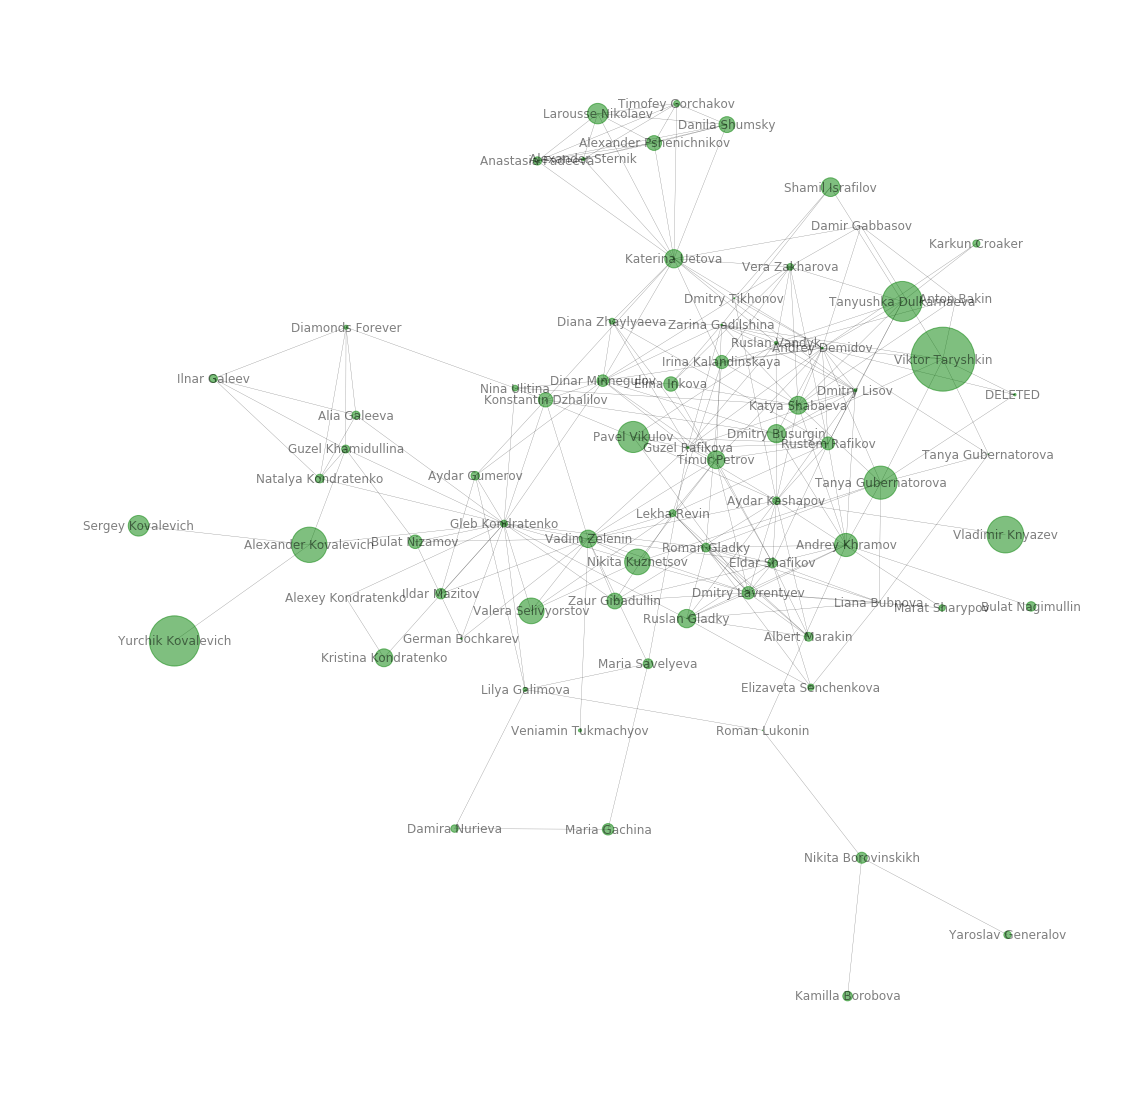

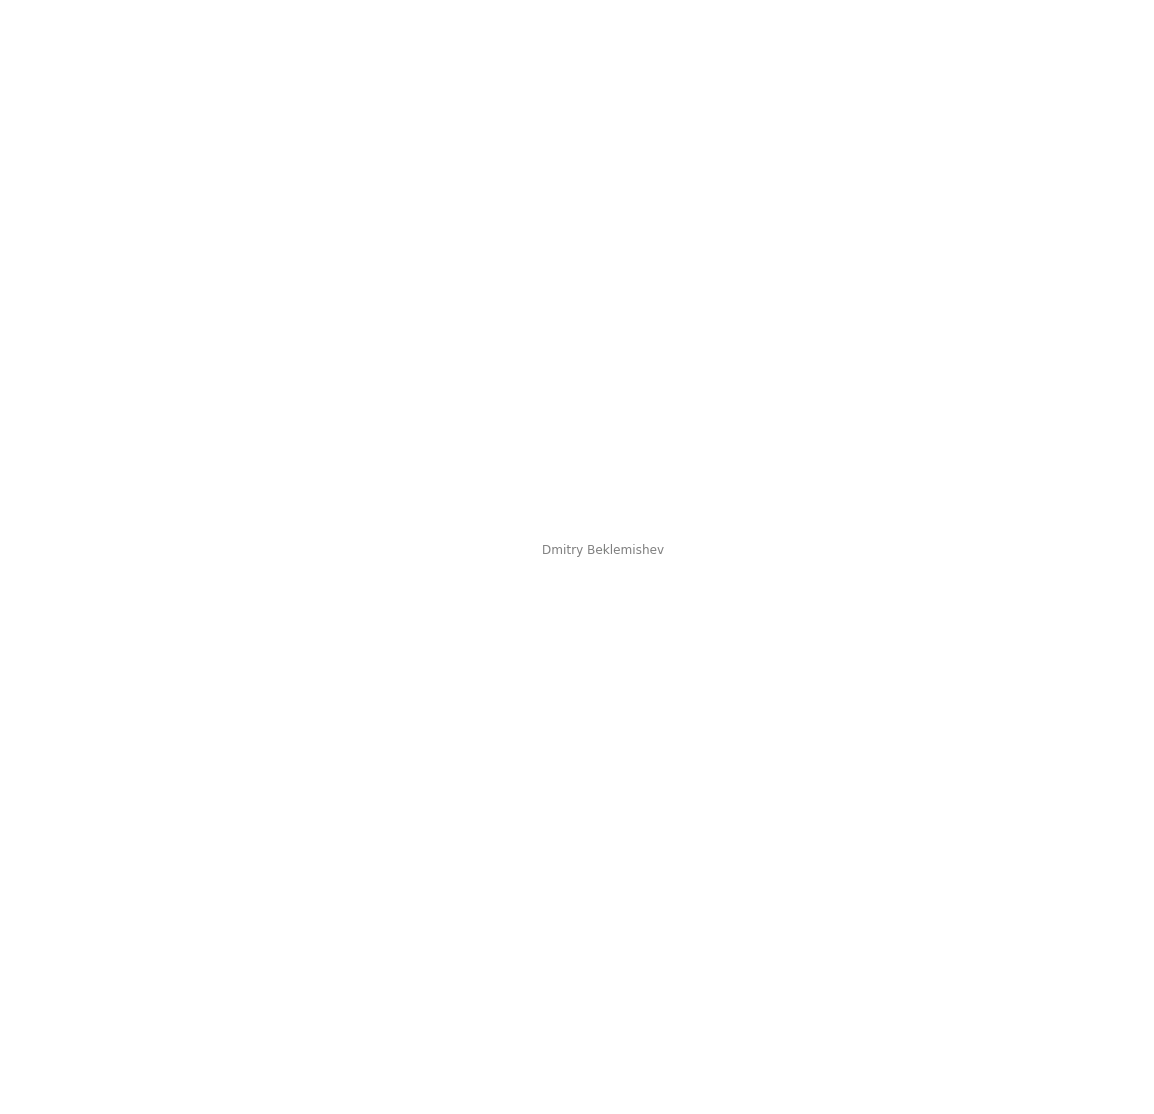

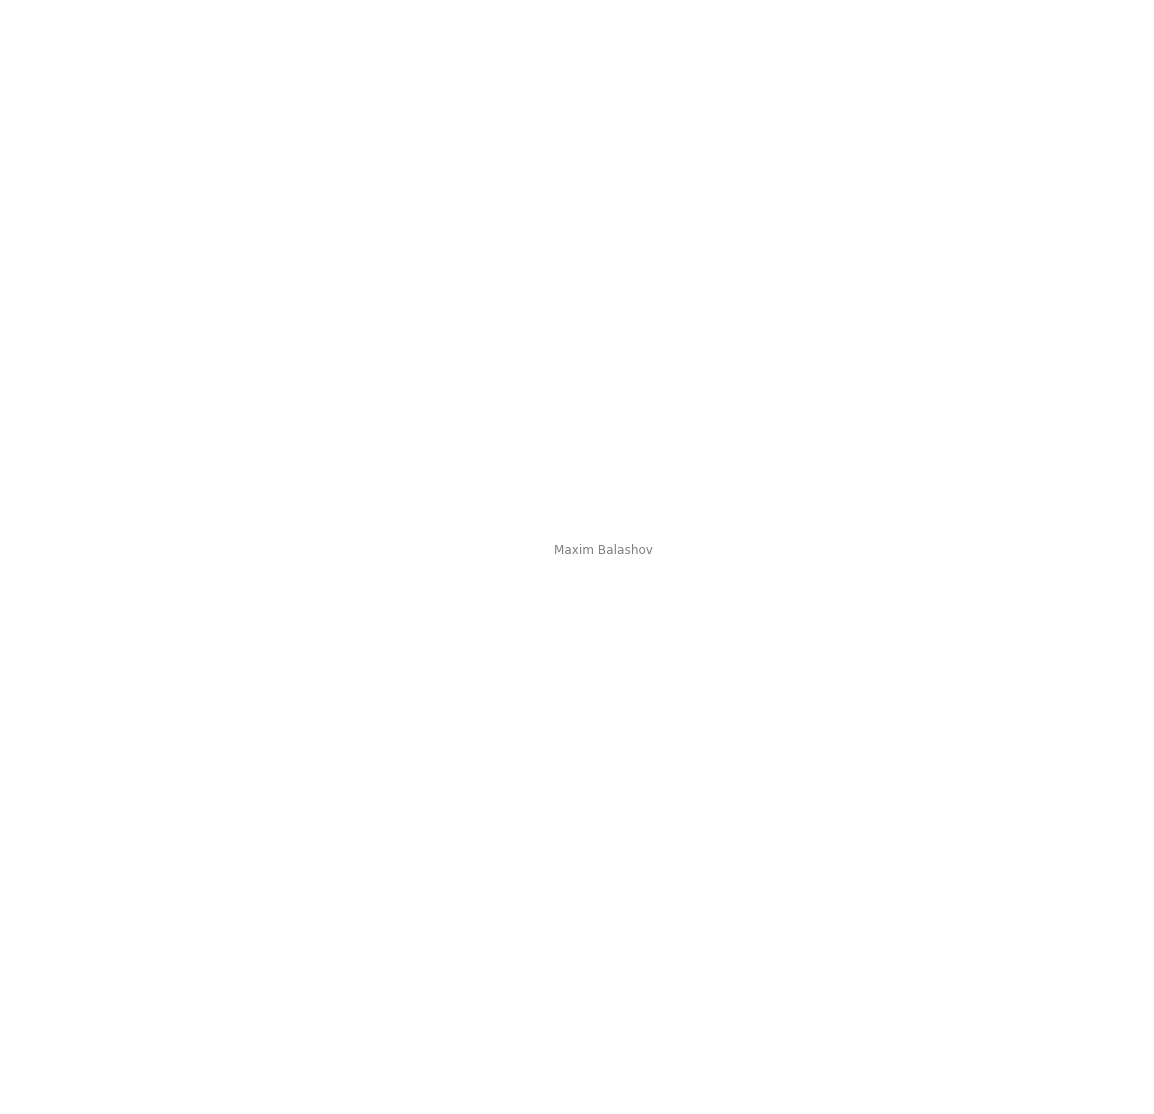

In [523]:
# здесь размер вершин betweenness_centrality
for i, ln in enumerate(list_nodes):

    plt.figure(figsize=(15,15))
    nx.draw_kamada_kawai(nx_graph.subgraph(ln),
                #pos,
                node_color='g', 
                node_size=ds_b, 
                alpha=0.5, 
                labels={id_:n for id_,n in names_.items() if id_ in ln},
                width=0.3,
                )
    plt.show()

Выделяются следующие сообщества:
- физтехи с моего потока (5ый курс)
- физтехи 4ый курс
- казанцы
- физтехи 6ой курс/выпускники
- очень интересный кластер из 773 группы, их кураторов (Саша Денисенко, Арина Соболева), их семинариста Кефира и ребят с ИТИС, которые знакомы с Сашей и Кефиром
- заинцы и примкнувшие к ним вышкинцы, которые связуются моей одноклассницей Катериной Уэтовой
- два фейка, сделанных, чтобы затралить старосту

# 4. VK network modelling